# Hands on with Graph Neural Networks

# **Installing Pytorch Geometric**

In [ ]:
# Enforce pytorch version 1.6.0
import torch
if torch.__version__ != '1.6.0':
  !pip uninstall torch -y
  !pip uninstall torchvision -y
  !pip install torch==1.6.0
  !pip install torchvision==0.7.0

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

Found existing installation: torch 1.9.0+cu102
Uninstalling torch-1.9.0+cu102:
  Successfully uninstalled torch-1.9.0+cu102
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 748.8 MB 19 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires torchvision, which is not installed.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


     |████████████████████████████████| 5.9 MB 6.3 MB/s 
1.6.0
10.2
Python 3.7.11
Tue Jul 20 09:40:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
      

Make sure you clicked "RESTART RUNTIME" above (if torch version was different)!

In [ ]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 2.9 MB 319 kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.6 MB 300 kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.1 MB 320 kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 371 kB 662 kB/s 
     |████████████████████████████████| 222 kB 8.7 MB/s 
     |████████████████████████████████| 231 kB 54.9 MB/s 
     |████████████████████████████████| 45 kB 4.6 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.2-py3-none-any.whl size=388142 sha256=6a3437be34de69e80cf47ebddf2619f3f0959a562f8d247aa7c1095393681541
  Stored in directory: /root/.cache/pip/wheels/55/93/b6/2eeb0465afe89aee74d7a07a606e9770466d7565abd45a99d5
Successfully built torch-


## Looking into the Dataset

In [ ]:
from torch_geometric.datasets import MNISTSuperpixels
from torch_geometric.data import DataLoader
 
# Load the MNISTSuperpixel dataset
data = MNISTSuperpixels(root=".")
data

Extracting ./raw/mnist_superpixels.tar.gz
Processing...
Done!


MNISTSuperpixels(60000)

In [ ]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

# edge_index = graph connections
# x = node features (75 nodes have each 1 feature)
# y = labels (dimension)

Dataset type:  <class 'torch_geometric.datasets.mnist_superpixels.MNISTSuperpixels'>
Dataset features:  1
Dataset target:  10
Dataset length:  <bound method InMemoryDataset.len of MNISTSuperpixels(60000)>
Dataset sample:  Data(edge_index=[2, 1399], pos=[75, 2], x=[75, 1], y=[1])
Sample  nodes:  75
Sample  edges:  1399


In [ ]:
data[1]

Data(edge_index=[2, 1260], pos=[75, 2], x=[75, 1], y=[1])

In [ ]:
# Investigating the features
# Shape: [num_nodes, num_node_features]
data[0].x

tensor([[0.6005],
        [0.7350],
        [0.5124],
        [0.7634],
        [0.5810],
        [0.7941],
        [0.7025],
        [0.6235],
        [0.7882],
        [0.5838],
        [0.5105],
        [0.2810],
        [0.5782],
        [0.7797],
        [0.4412],
        [0.6409],
        [0.2843],
        [0.7843],
        [0.6980],
        [0.5314],
        [0.8451],
        [0.7182],
        [0.2941],
        [0.6033],
        [0.8843],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0

In [ ]:

# Shape [2, num_edges]
data[0].edge_index.t()

tensor([[ 0,  3],
        [ 0,  8],
        [ 0, 10],
        ...,
        [74, 55],
        [74, 63],
        [74, 69]])

In [ ]:
data[0].y

tensor([5])

# Implementing Graph Neural Network
Building a Graph Neural Network works the same way as building a Convolutional Neural Network, we simple add some layers.

The GCN simply extends torch.nn.Module. GCNConv expects:

    in_channels = Size of each input sample.
    out_channels = Size of each output sample.

We apply three convolutional layers, which means we learn the information about 3 neighbor hops. After that we apply a pooling layer to combine the information of the individual nodes, as we want to perform graph-level prediction.

Always keep in mind that different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.


In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64
class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)
        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)
        # Output layer
        self.out = Linear(embedding_size*2, data.num_classes)
    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)
        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)
        # Apply a final (linear) classifier.
        out = self.out(hidden)
        return out, hidden
model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(1, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=10, bias=True)
)
Number of parameters:  13898


In [ ]:
data_size = len(data)

## Training the GNN

In [ ]:
data=data[:int(data_size * 0.15)]

In [ ]:
len(data)

9000

In [ ]:
data

MNISTSuperpixels(9000)

In [ ]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Cross EntrophyLoss
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)  
# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      loss = torch.sqrt(loss_fn(pred, batch.y))       
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding
print("Starting training...")
losses = []
for epoch in range(500):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 10 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 1.5148050785064697
Epoch 10 | Train Loss 1.4366984367370605
Epoch 20 | Train Loss 1.4514868259429932
Epoch 30 | Train Loss 1.3604230880737305
Epoch 40 | Train Loss 1.4146132469177246
Epoch 50 | Train Loss 1.378815770149231
Epoch 60 | Train Loss 1.2531322240829468
Epoch 70 | Train Loss 1.4220671653747559
Epoch 80 | Train Loss 1.454863429069519
Epoch 90 | Train Loss 1.272745132446289
Epoch 100 | Train Loss 1.3627382516860962
Epoch 110 | Train Loss 1.3778774738311768
Epoch 120 | Train Loss 1.3671669960021973
Epoch 130 | Train Loss 1.351637840270996
Epoch 140 | Train Loss 1.3455959558486938
Epoch 150 | Train Loss 1.2958712577819824
Epoch 160 | Train Loss 1.3460414409637451
Epoch 170 | Train Loss 1.3411741256713867
Epoch 180 | Train Loss 1.3233259916305542
Epoch 190 | Train Loss 1.2683193683624268
Epoch 200 | Train Loss 1.3071640729904175
Epoch 210 | Train Loss 1.381005048751831
Epoch 220 | Train Loss 1.3129782676696777
Epoch 230 | Train Loss 1.2032

### Visualizing the Training loss

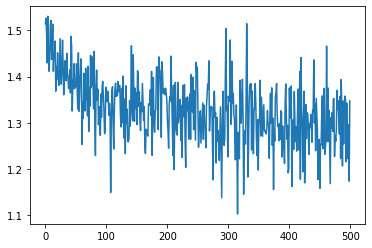

In [ ]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt



### Getting a test prediction

In [ ]:
import pandas as pd 
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    pred=torch.argmax(pred,dim=1)
print(test_batch.y[0])#Actual REsult
print(pred[0])#Predicted Result


tensor(1, device='cuda:0')
tensor(1, device='cuda:0')


In [ ]:
import torch
import networkx as nx
import matplotlib.pyplot as plt


def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [ ]:
data

MNISTSuperpixels(9000)

Is undirected: True


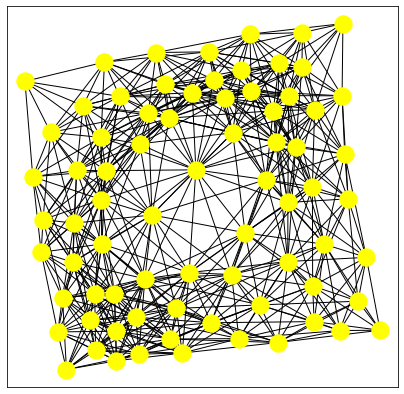

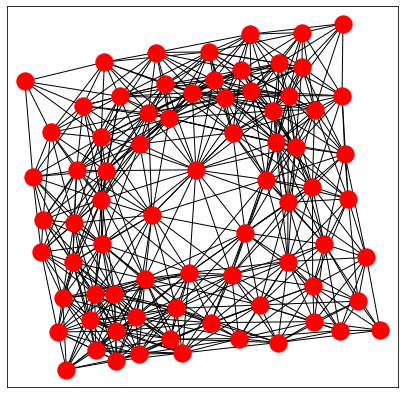

In [ ]:
dataset=data[1]
print(f'Is undirected: {dataset.is_undirected()}')
from torch_geometric.utils import to_networkx
G = to_networkx(dataset, to_undirected=True)
 
visualize(G, "yellow") 
visualize(G, "red")

In [ ]:
dataset.y

tensor([0])